In [2]:
import json
# 数据集对应路径
path ='usagov_bitly_data.txt'
# 显示数据集的第一行
open(path).readline()
# 此处应该可以看到一长串字符串，为JSON格式


'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
records = [json.loads(line) for line in open(path)]
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [4]:
records[0]['tz']

u'America/New_York'

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print time_zones[:10]

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'']


In [6]:
from collections import defaultdict

def get_counts(sequence):
    counts = defaultdict(int)  # 所有的值均会被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']  # 检查New York这个时区的计数情况  此时得出的counts是一个字典
#print counts

1251

In [7]:
len(time_zones)

3440

In [8]:
#字典处理技巧

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)


[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [9]:
#当然，你也可以使用Python标准库collections.Counter来完成上述任务：
from collections import Counter
counts = Counter(time_zones)  # 计数
counts.most_common(10)  # 计数前十

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

# 使用pandas对时区进行计数

实现对时区的计数，只需要如下代码：

In [10]:
from pandas import DataFrame, Series
import pandas as ps
import numpy as np

frame = DataFrame(records)
print frame[:3]  # 检视frame，一长串。这被称为frame的摘要视图（summary view）


   _heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   

          hh   kw        l                        ll   nk  \
0  1.usa.gov  NaN  orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN    bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN    bitly     [38.9007, -77.043098]  1.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/ 

<class 'pandas.core.series.Series'>
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


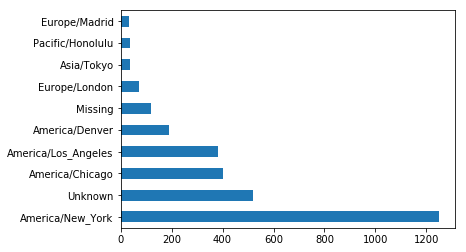

In [11]:
clean_tz = frame['tz'].fillna('Missing')  # 用`Missing`替换缺失值
clean_tz[clean_tz == ''] = 'Unknown'  # 用`Unknown`替换空白值
print type(clean_tz)

%matplotlib inline
#frame[‘tz’]所返回的Series对象有一个value_counts方法
tz_counts = clean_tz.value_counts()
print tz_counts[:10]  # 检视计数的前十项
tz_counts[:10].plot(kind='barh', rot=0)  # 绘图，可视化的方式展示前十项


In [12]:
frame['a'][0]

u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

# 运用Python内置的字符串函数和正则表达式，可以将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要：

In [13]:
results = Series([x.split()[0] for x in frame.a.dropna()]) #按空格切分字段'a'
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [14]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

# 现在，根据Windows用户和非Windows用户对时区统计信息进行分解。为了方便起见，嘉定只要agent字符串中含有“Windows”就认为该用户为Windows用户。

In [15]:
cframe = frame[frame.a.notnull()] #删除agent为空的记录
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='|S11')

# 接下来就可以根据时区和新得到的操作系统列表对数据进行分组，然后通过size对分组结果进行计数（类似于上面的value_counts函数），并利用unstack对技术结果进行重塑：

In [18]:
by_tz_os = cframe.groupby(['tz',operating_system])
#print by_tz_os
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

# 最后，选出最常出现的时区。根据agg_counts中的行数构造一个间接索引数组：

In [19]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

# 然后通过take按照这个顺序截取最后10行：

In [20]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

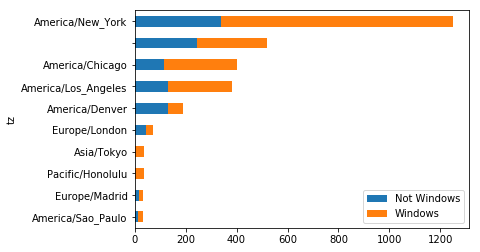

In [21]:
count_subset.plot(kind='barh',stacked=True)

# 为了看清楚小分组中Windows用户的相对比例，可以将各行规范化为“总计为1”并重新绘图：

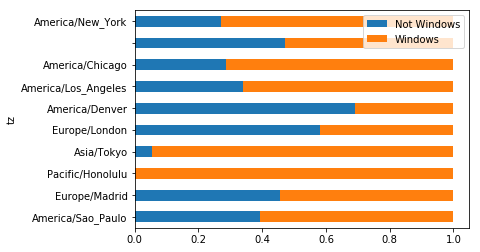

In [22]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)